<a href="https://colab.research.google.com/github/lautitorraca/7506R-2C2023-GRUPO24/blob/main/TP1/7506R_TP1_GRUPO24_CHP2_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Practico 1: Reservas de Hotel

## 𝔾𝕣𝕦𝕡𝕠 𝟚𝟜 (Merequetengue👍)

      ➢ Torraca Lautaro - 108813
      ➢ Negrotti Gianluca - 108184
      ➢ Marco Tosi - 107237

### » Imports

In [1572]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from google.colab import files


from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# » Lectura de los archivos

In [1573]:
url_train = 'https://raw.githubusercontent.com/lautitorraca/7506R-2C2023-GRUPO24/main/TP1/DataSets/hotels_train.csv'
url_test = 'https://raw.githubusercontent.com/lautitorraca/7506R-2C2023-GRUPO24/main/TP1/DataSets/test_limpio%20-%20ds_unificado.csv'

ds_train_base = pd.read_csv(url_train)
ds_test_base = pd.read_csv(url_test)

ds_test = ds_test_base.copy()
df_test = pd.DataFrame(ds_test_base)

ds_train = ds_train_base.copy()
df_train = pd.DataFrame(ds_train_base)

# » Analisis del DataSet de train


Realizamos un breve analizis sobre el dataset para ver valores atipicos y/o valores nulos los cuales no queremos tenerlos en cuenta.

### » Muestra del DataSet de Train


In [1574]:
ds_train.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,No Deposit,9.0,NaN,0,Transient,115.5,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,No Deposit,NaN,NaN,0,Transient,42.0,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,No Deposit,9.0,NaN,0,Transient,229.0,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,Non Refund,154.0,NaN,0,Transient,75.0,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,No Deposit,20.0,NaN,0,Transient-Party,75.0,0,1,28c75445-c603-413a-babf-ad377018b592,0


#### - **Cantidad de columnas y filas**

In [1575]:
ds_train.shape

(61913, 31)

### » Tipos de las varibales

In [1576]:
ds_train.dtypes

hotel                              object
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           

### » Separación de variables cuantitativas

In [1577]:
nombre_variables_cuantitativas = ['lead_time','arrival_date_week_number', 'stays_in_weekend_nights', 'adults',
                                  'children','babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
                                  'booking_changes', 'agent', 'adr', 'required_car_parking_spaces', 'total_of_special_requests' ]

ds_cuantitativo = ds_train.loc[:, nombre_variables_cuantitativas]
df = pd.DataFrame()
df['media'] = round(ds_cuantitativo.mean(), 2)
df['mediana'] = ds_cuantitativo.median()
df['moda'] = ds_cuantitativo.mode().iloc[0]
df['max'] = ds_cuantitativo.max()
df

,media,mediana,moda,max
lead_time,112.25,78.0,0.0,629.0
arrival_date_week_number,27.22,28.0,33.0,53.0
stays_in_weekend_nights,0.92,1.0,0.0,16.0
adults,1.86,2.0,2.0,55.0
children,0.10,0.0,0.0,10.0
babies,0.01,0.0,0.0,9.0
is_repeated_guest,0.03,0.0,0.0,1.0
previous_cancellations,0.11,0.0,0.0,26.0
previous_bookings_not_canceled,0.12,0.0,0.0,70.0
booking_changes,0.20,0.0,0.0,17.0


### » Separación de las variables cualitativas

In [1578]:
nombre_variables_cualitativas = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'reserved_room_type', 'distribution_channel', 'assigned_room_type',
                                 'deposit_type', 'customer_type']

ds_cualitativo = ds_train.loc[:, nombre_variables_cualitativas]

### » Cantidad de valores que admiten las varibles cualitativas.

In [1579]:
ds_cualitativo.nunique().sort_values(ascending=True)

hotel                     2
deposit_type              3
customer_type             4
meal                      5
distribution_channel      5
market_segment            8
reserved_room_type       10
arrival_date_month       12
assigned_room_type       12
country                 149
dtype: int64

### » Frecuencia de los valores

- **Hoteles.**

In [1580]:
round(ds_cualitativo.hotel.value_counts(normalize=True) * 100, 2)

City Hotel      68.05
Resort Hotel    31.95
Name: hotel, dtype: float64


- **Tipo de depósito.**

In [1581]:
round(ds_cualitativo.deposit_type.value_counts(normalize=True) * 100, 2)

No Deposit    83.48
Non Refund    16.39
Refundable     0.13
Name: deposit_type, dtype: float64

tiene Undefined


- **Canal de distribución.**

In [1582]:
round(ds_cualitativo.distribution_channel.value_counts(normalize=True) * 100, 2)

TA/TO        83.74
Direct       10.98
Corporate     5.12
GDS           0.14
Undefined     0.01
Name: distribution_channel, dtype: float64

- **Tipo de cliente.**

In [1583]:
round(ds_cualitativo.customer_type.value_counts(normalize=True) * 100, 2)

Transient          76.64
Transient-Party    19.65
Contract            3.28
Group               0.42
Name: customer_type, dtype: float64

- **Comida.**

In [1584]:
round(ds_cualitativo.meal.value_counts(normalize=True) * 100, 2)

BB           77.26
HB           12.04
SC            8.97
Undefined     0.95
FB            0.77
Name: meal, dtype: float64

tiene Undefined

- **Segmento de mercado (método de reserva).**

In [1585]:
round(ds_cualitativo.market_segment.value_counts(normalize=True) * 100, 3)

Online TA        47.274
Offline TA/TO    20.002
Groups           18.647
Direct            9.299
Corporate         4.012
Complementary     0.580
Aviation          0.183
Undefined         0.003
Name: market_segment, dtype: float64

- **Mes de llegada**

In [1586]:
round(ds_cualitativo.arrival_date_month.value_counts(normalize=True) * 100, 2)

August       11.59
July         10.54
May           9.95
April         9.49
October       9.47
June          9.32
September     9.08
March         7.91
February      6.66
December      5.64
November      5.50
January       4.85
Name: arrival_date_month, dtype: float64

- **País**

In [1587]:
ds_cualitativo.country.value_counts(normalize=True) * 100

PRT    45.305712
GBR     9.292939
FRA     7.795176
ESP     6.824224
DEU     5.368605
         ...    
HND     0.001621
FJI     0.001621
LIE     0.001621
ATA     0.001621
RWA     0.001621
Name: country, Length: 149, dtype: float64

### » Separacion de las variables ordinales

In [1588]:
nombre_variables_ordinales = ['reserved_room_type', 'assigned_room_type']

ds_ordinales = ds_train.loc[:, nombre_variables_ordinales]

- **Tipo de habitación reservada.**

In [1589]:
round(ds_ordinales.reserved_room_type.value_counts(normalize=True) * 100, 3)

A    72.899
D    15.481
E     5.248
F     2.344
G     1.761
B     0.937
C     0.779
H     0.539
P     0.011
L     0.002
Name: reserved_room_type, dtype: float64

- **Tipo de habitación asignada**

In [1590]:
round(ds_ordinales.assigned_room_type.value_counts(normalize=True) * 100, 3)

A    64.618
D    19.689
E     6.104
F     2.941
G     2.063
C     1.820
B     1.706
H     0.620
I     0.234
K     0.192
P     0.011
L     0.002
Name: assigned_room_type, dtype: float64

# » Analisis de nulos en el DataSet

In [1591]:
ds_train.isna().sum()

hotel                                 0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             221
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              7890
company                           58761
days_in_waiting_list                  0


# » Valores atipicos e imputaciones.


Luego de analizar los valores mostrados anteriormente procedemos a eliminar los valores que consideramos como outsiders.

In [1592]:
df_train.shape

(61913, 31)

- **Adulto**

In [1593]:
df_train = df_train[(df_train['adults'] <= 6) & (df_train['adults'] >= 1)]
df_train.shape

(61708, 31)

- **Hijos**


In [1594]:
df_train = df_train[(df_train['children'] <= 4) & (df_train['children'] >= 0)]
df_train.shape

(61703, 31)

- **Bebes**

Filtrado de los datos

In [1595]:
df_train = df_train[(df_train['babies'] <= 3) & (df_train['babies'] >= 0)]
df_train.shape

(61702, 31)

- **Playas de estacionamientos**

In [1596]:
df_train = df_train[(df_train['required_car_parking_spaces'] <= 3) & (df_train['required_car_parking_spaces'] >= 0)]
df_train.shape

(61701, 31)

## - **Muestra del DataSet limpio**

In [1597]:
nombre_variables_cuantitativas = ['lead_time','arrival_date_week_number', 'stays_in_weekend_nights', 'adults',
                                  'children','babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
                                  'booking_changes', 'agent', 'adr', 'required_car_parking_spaces', 'total_of_special_requests' ]

ds_cuantitativo = df_train.loc[:, nombre_variables_cuantitativas]
df = pd.DataFrame()
df['media'] = round(ds_cuantitativo.mean(), 2)
df['mediana'] = ds_cuantitativo.median()
df['moda'] = ds_cuantitativo.mode().iloc[0]
df['max'] = ds_cuantitativo.max()
df

,media,mediana,moda,max
lead_time,112.27,78.0,0.0,629.0
arrival_date_week_number,27.21,28.0,33.0,53.0
stays_in_weekend_nights,0.92,1.0,0.0,16.0
adults,1.87,2.0,2.0,6.0
children,0.10,0.0,0.0,3.0
babies,0.01,0.0,0.0,2.0
is_repeated_guest,0.03,0.0,0.0,1.0
previous_cancellations,0.12,0.0,0.0,26.0
previous_bookings_not_canceled,0.12,0.0,0.0,70.0
booking_changes,0.19,0.0,0.0,17.0


# »  Preparacion de los DataSets

Procedemos a preparar ambos DataSets para poder entrenar y predecir.

- Analizamos la cantidad de columnas y filas



In [1598]:
print('Train:', ds_train.shape)
print('Test:', ds_test.shape)

Train: (61913, 31)
Test: (26535, 31)


Buscamos las columans que no coinciden en ambos DataSets


In [1599]:
columnas_faltantes_en_train = set(ds_test.columns) - set(ds_train.columns)
columnas_faltantes_en_test = set(ds_train.columns)- set(ds_test.columns)
print('Columnas faltantes es train:', columnas_faltantes_en_train)
print('Columnas faltantes es test:', columnas_faltantes_en_test)

Columnas faltantes es train: {'reservation_status_date'}
Columnas faltantes es test: {'is_canceled'}


Vemos que el dataSet de test tiene una columan de mas que no se encuentra en train, por lo que prodecemos a eliminarla ya que creemos que no es relevante para el calculo del is_canceled.



#### - **Arreglo del DataSet de test**

Debemos eliminar las columnas que unicamenten faltan el train y agregar las que faltan en test ya que deben tener las mismas columnas con los mismos nombres.

In [1600]:
columna_a_eliminar_test = 'reservation_status_date'

ds_test.drop(columna_a_eliminar_test, axis='columns', inplace = True)
ds_test.insert(1, 'is_canceled', " ")
df_test = pd.DataFrame(ds_test)
ds_test.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id
0,City Hotel,,277,2016,November,46,7,1,2,2,...,0,Non Refund,not applicable,not applicable,0,Transient,100.0,0,0,e6d0d58a-ab96-44d3-b28f-85df1cc15f1e
1,City Hotel,,286,2016,May,20,11,0,4,2,...,0,No Deposit,30.0,not applicable,176,Transient-Party,101.0,0,0,aba9aac2-4495-4645-a60e-90328713c999
2,City Hotel,,0,2016,August,35,23,0,1,3,...,0,No Deposit,not applicable,not applicable,0,Transient,225.0,0,2,b345b5dc-c804-4d77-a39f-1f4e65d1f1ad
3,Resort Hotel,,196,2016,October,44,29,2,5,2,...,0,No Deposit,240.0,not applicable,0,Transient,96.0,0,0,ce1b400e-afa1-4946-bdff-004b859eb61c
4,Resort Hotel,,232,2016,November,48,26,2,1,2,...,0,Non Refund,11.0,not applicable,0,Transient,30.0,0,0,c4fbec0d-8e2e-4db2-9d4f-a6ccb9f51214


### - **Seleccion de columnas utiles para la prediccion**

In [1601]:
ds_trabajo_train = ds_train.copy()
ds_trabajo_test = ds_test.copy()

- Buscamos datos faltantes y procedemos a tomar decisiones sobre que hacer con estos datos faltantes

In [1602]:
filas_totales=ds_trabajo_train.shape[0]
print(ds_trabajo_train.isna().sum()/filas_totales*100)

hotel                              0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.006461
babies                             0.000000
meal                               0.000000
country                            0.356952
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                           

In [1603]:
df_trabajo_train = pd.DataFrame(ds_trabajo_train)
df_trabajo_test = pd.DataFrame(ds_trabajo_test)

df_trabajo_train.shape

(61913, 31)

In [1604]:
df_trabajo_train.dropna(subset=['children'], inplace=True)
df_trabajo_train.dropna(subset=['country'], inplace=True)
df_trabajo_train.dropna(subset=['agent'], inplace=True)
df_trabajo_train.shape

(53944, 31)

Verificamos la existencia de NaNs de nuevo.

In [1605]:
filas_totales = df_trabajo_train.shape[0]
print(df_trabajo_train.isna().sum()/filas_totales*100)


hotel                              0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.000000
babies                             0.000000
meal                               0.000000
country                            0.000000
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
agent                           

» Matriz de correlacion

Sera utilizada para analizar posibles columnas utiles para el calculo de la columnas is_canceled

<Axes: >

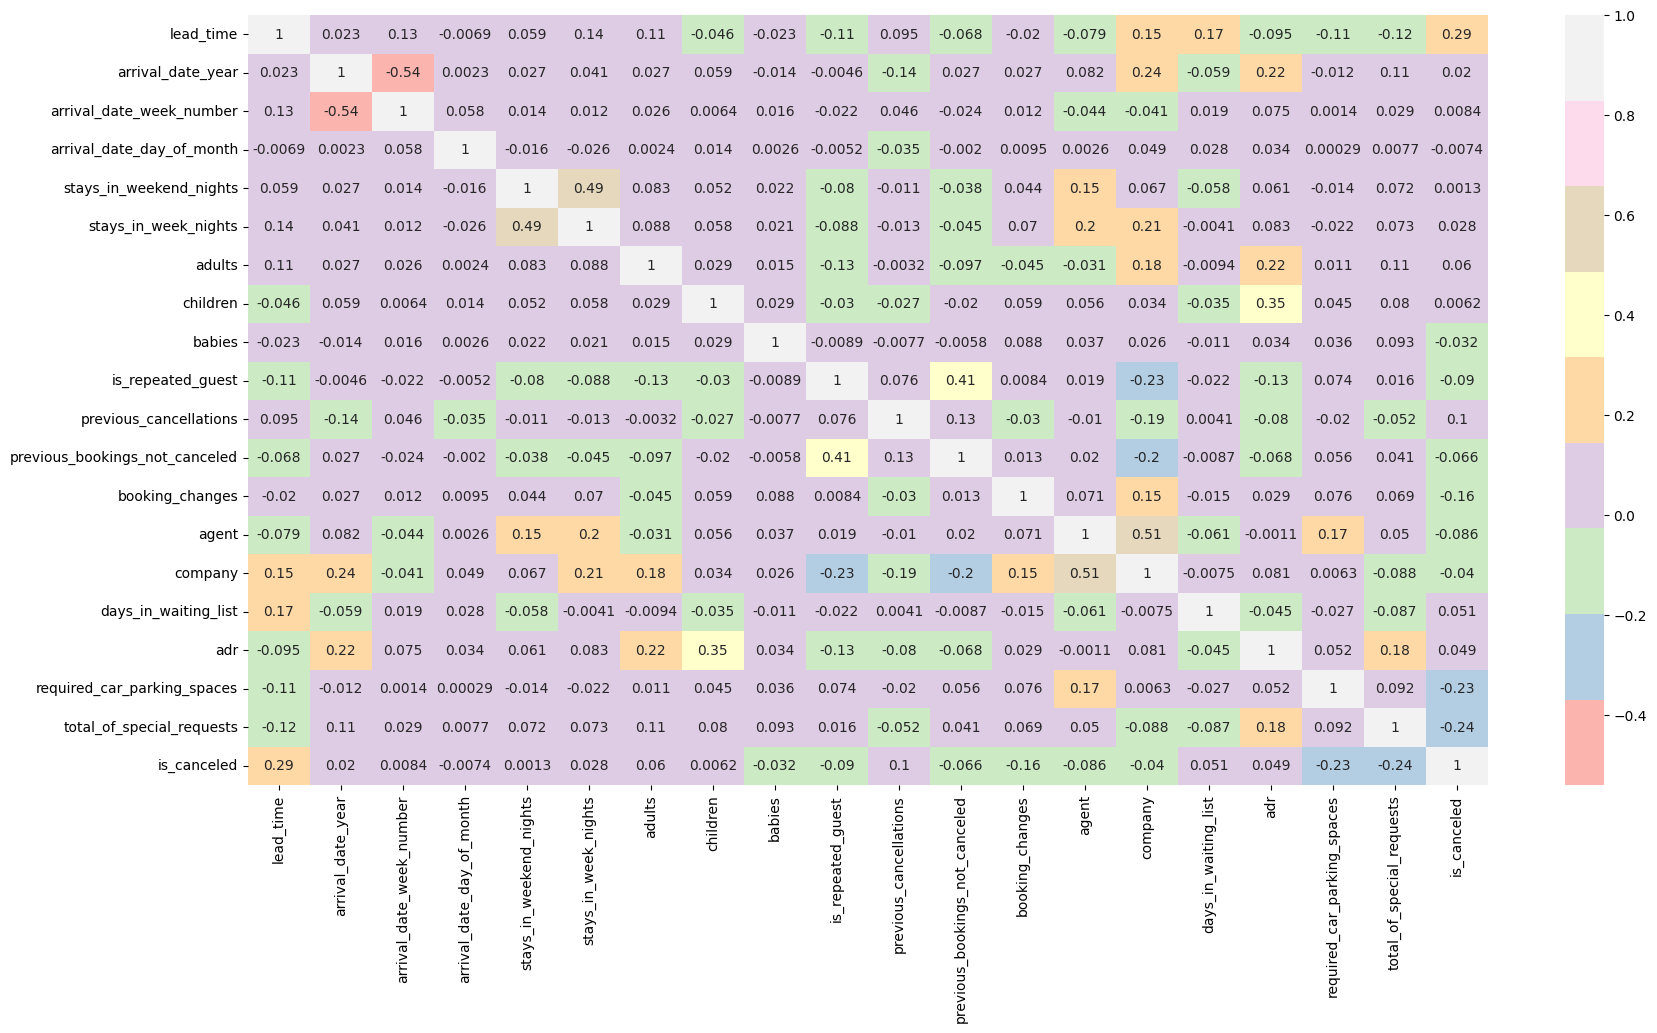

In [1606]:
df_trabajo_train.corr(numeric_only = True)
plt.figure(figsize = (20,10))
sns.heatmap(ds_train.corr(numeric_only = True),annot = True, cmap= "Pastel1")

### » Entramiento y prediccion con el primer modelo de arbol planteado. (Modelo 1)

- **Agregamos, eliminamos y modificamos valores para que esten en ambos DataSets**


 Analizando los graficos del CHP1 y la cantidad de valores que admiten las variables observamos que tanto country como assigned_room_type tiene valores que no se encuentran en ambos DataSets.

Procedemos a buscar los paises que se encuentran en ambos DataSets y hacemos que coincidan los de train con los de test.

In [1607]:
df_trabajo_train.shape

(53944, 31)

In [1608]:
features1 = ['hotel', 'adults', 'children', 'meal', 'country', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'assigned_room_type',
             'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'is_canceled', 'id']

df_trabajo_train1 = df_trabajo_train[features1]
df_trabajo_test1 = df_trabajo_train[features1]

- **Dummies a las columnas de los DataSets**

In [1609]:
columns_to_dum1= ['hotel', 'meal', 'country', 'assigned_room_type', 'deposit_type', 'customer_type']

In [1610]:
df_trabajo_train_dum1 = pd.get_dummies(df_trabajo_train1, columns = columns_to_dum1 )
df_trabajo_train_dum1.head(5)

,adults,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,is_canceled,id,hotel_City Hotel,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1,0.0,0,0,0,0,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,...,0,0,0,1,0,0,0,0,1,0
2,2,2.0,0,0,0,0,0,0,2226c018-ea20-4c4e-8f71-ea66aee70d7c,1,...,0,0,0,1,0,0,0,0,1,0
3,2,0.0,0,0,0,0,0,1,314f56dc-2e4d-4298-9bdd-27bb008bffff,1,...,0,0,0,0,1,0,0,0,1,0
4,2,0.0,0,0,0,0,0,0,28c75445-c603-413a-babf-ad377018b592,1,...,0,0,0,1,0,0,0,0,0,1
6,2,0.0,0,0,0,1,0,0,c7e59753-c8a7-42eb-977b-f0ffaf1716eb,0,...,0,0,0,1,0,0,1,0,0,0


In [1611]:
df_trabajo_test_dum1 = pd.get_dummies(df_trabajo_test1, columns = columns_to_dum1 )
df_trabajo_test_dum1.head()

,adults,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,is_canceled,id,hotel_City Hotel,...,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,1,0.0,0,0,0,0,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,...,0,0,0,1,0,0,0,0,1,0
2,2,2.0,0,0,0,0,0,0,2226c018-ea20-4c4e-8f71-ea66aee70d7c,1,...,0,0,0,1,0,0,0,0,1,0
3,2,0.0,0,0,0,0,0,1,314f56dc-2e4d-4298-9bdd-27bb008bffff,1,...,0,0,0,0,1,0,0,0,1,0
4,2,0.0,0,0,0,0,0,0,28c75445-c603-413a-babf-ad377018b592,1,...,0,0,0,1,0,0,0,0,0,1
6,2,0.0,0,0,0,1,0,0,c7e59753-c8a7-42eb-977b-f0ffaf1716eb,0,...,0,0,0,1,0,0,1,0,0,0


- **Entrenamiento del arbol1**

In [1612]:

df_trabajo_x1= df_trabajo_train_dum1.drop(['is_canceled', 'id'], axis='columns', inplace=False)

df_trabajo_y1 = df_trabajo_train_dum1['is_canceled'].copy()

x_train1, x_test1, y_train1, y_test1= train_test_split(df_trabajo_x1,
                                                       df_trabajo_y1,
                                                       test_size=0.30,
                                                       random_state=13)


In [1613]:
tree_model1 = tree.DecisionTreeClassifier(criterion = 'log_loss',
                                          max_depth = 25,
                                          min_samples_leaf = 10,
                                          ccp_alpha = 0)

In [1614]:
model1 = tree_model1.fit(X = x_train1, y = y_train1)

y_pred1 = model1.predict(x_test1)


- **Muestra de la matris de confusion**

Text(50.722222222222214, 0.5, 'True')

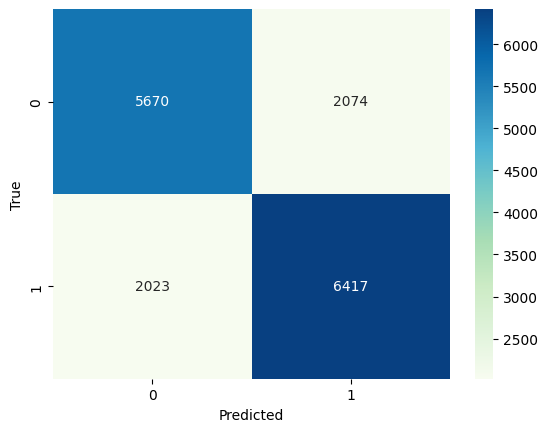

In [1615]:
tabla1 = confusion_matrix(y_test1, y_pred1)
sns.heatmap(tabla1,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')


- **Calculo de las metricas**

In [1616]:
def mostrar_metricas(y_test, y_pred):
    accuracy=accuracy_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)

    print("Accuracy: "+str(accuracy))
    print("Recall: "+str(recall))
    print("Precision: "+str(precision))
    print("f1 score: "+str(f1))

In [1617]:
mostrar_metricas(y_test1, y_pred1)

Accuracy: 0.7468487394957983
Recall: 0.760308056872038
Precision: 0.7557413732187022
f1 score: 0.758017837103538


- Prediccion con el dataset de Test

In [1618]:

df_trabajo_test_x1 = df_trabajo_test_dum1.drop(['is_canceled', 'id'], axis='columns', inplace=False)
ids1 = df_trabajo_test_dum1['id'].copy()

prediccion1 = tree_model1.predict(X = df_trabajo_test_x1)
df_resultado1 = pd.DataFrame(zip(ids1, prediccion1),columns=['id','is_canceled'])
# df_resultado1.to_csv('df_prediccion.csv')
# files.download('df_prediccion.csv')

- Analisis de la importancia de cada feature en al hora de al prediccion

In [1619]:
sorted(list(zip(df_trabajo_test_dum1.columns.to_list(), model1.feature_importances_)), key=lambda x: -x[1])

[('assigned_room_type_K', 0.45650812800786195),
 ('country_POL', 0.1384123417283093),
 ('previous_cancellations', 0.07964218693997707),
 ('customer_type_Contract', 0.048574410765049154),
 ('booking_changes', 0.03018790163195222),
 ('is_canceled', 0.019224075714571808),
 ('children', 0.019101902508498022),
 ('country_ZMB', 0.017960765742965953),
 ('adults', 0.016906525120677425),
 ('country_CYP', 0.01469157479083144),
 ('assigned_room_type_B', 0.014490271294515179),
 ('is_repeated_guest', 0.013168949822753549),
 ('previous_bookings_not_canceled', 0.010459100855554892),
 ('country_ISL', 0.010091702216225129),
 ('hotel_City Hotel', 0.009463064821000204),
 ('country_FIN', 0.009397809676686438),
 ('meal_BB', 0.009177661427967268),
 ('days_in_waiting_list', 0.00745599054222047),
 ('country_ZWE', 0.006311133089393761),
 ('meal_FB', 0.005863228100547875),
 ('assigned_room_type_D', 0.005638428741545425),
 ('customer_type_Group', 0.005042338819246306),
 ('assigned_room_type_E', 0.004214334653364

### » Entramiento y prediccion con el segundo modelo de arbol planteado. (Modelo 2, Split)

In [1620]:


features2 = ['hotel','lead_time','adults', 'children', 'meal', 'country', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'assigned_room_type',
             'booking_changes',  'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'is_canceled', 'id']

df_split_train2 = df_trabajo_train[features2]
df_split_test2= df_trabajo_test[features2]

features_to_dum2 = [ 'hotel', 'meal', 'country', 'assigned_room_type', 'deposit_type', 'customer_type']

target2 = 'is_canceled'


In [1621]:
df_split_train2 = df_split_train2.dropna(subset=['country'])

train_countries = set(df_split_train2['country'].unique())
test_countries = set(df_split_test2['country'].unique())

# 1. Manejar ds_trabajo_train
for country in train_countries:
    # Si el país no está en ds_trabajo_test
    if country not in test_countries:
        country_count = df_split_train2['country'].value_counts()[country]
        # Si aparece menos del 0.01%
        if country_count / len(df_split_train2) <= 0.0001:
            df_split_train2.loc[df_split_train2['country'] == country, 'country'] = 'Undefined'

# 2. Manejar ds_trabajo_test
for country in test_countries:
    # Si el país no está en ds_trabajo_train (después de las posibles sustituciones)
    if country not in train_countries:
        df_split_test2.loc[df_split_test2['country'] == country, 'country'] = 'Undefined'

In [1622]:
missing_categories = set(df_split_train2['country'].unique()) - set(df_split_test2['country'].unique())

# Cambiar estas categorías a 'Undefined' en 'ds_trabajo_train'
for category in missing_categories:
    df_split_train2.loc[df_split_train2['country'] == category, 'country'] = 'Undefined'

In [1623]:
unique_values_in_test = set(df_split_test2['assigned_room_type'].unique())
unique_values_in_train = set(df_split_train2['assigned_room_type'].unique())
values_to_replace = unique_values_in_test - unique_values_in_train

mode_in_test = df_split_test2['assigned_room_type'].mode()[0]

# 2. Reemplazar esos valores por "Undefined" en test
for value in values_to_replace:
    df_split_test2.loc[df_split_test2['assigned_room_type'] == value, 'assigned_room_type'] = mode_in_test

- Verificacion del balanceo de clases

In [1624]:

df_split_train2[target2].value_counts(normalize=True)*100

1    52.105888
0    47.894112
Name: is_canceled, dtype: float64

- Evaluacion del dataset

In [1625]:

df_split_train_dum2 = pd.get_dummies(df_split_train2[features2], columns = features_to_dum2)
df_split_test_dum2 = pd.get_dummies(df_split_test2[features2], columns = features_to_dum2)

x_train2, x_test2, y_train2, y_test2 = train_test_split(df_split_train_dum2.drop(['id', 'is_canceled'], axis=1).values,
                                                     df_split_train2[target2].values,
                                                     test_size=0.3,
                                                     random_state=13,
                                                     stratify=df_split_train2[target2].values)



In [1626]:

print('# Datos Entrenamiento: {}'.format(len(x_train2)))
print('# Datos Prueba: {}'.format(len(x_test2)))

for split_name, split in zip(['% Positivos Entrenamiento','% Positivos Prueba'],[y_train2,y_test2]):
  print('{}: {:.3f}'.format(split_name,pd.Series(split).value_counts(normalize=True)[1]*100))


# Datos Entrenamiento: 37760
# Datos Prueba: 16184
% Positivos Entrenamiento: 52.105
% Positivos Prueba: 52.107


Text(50.722222222222214, 0.5, 'True')

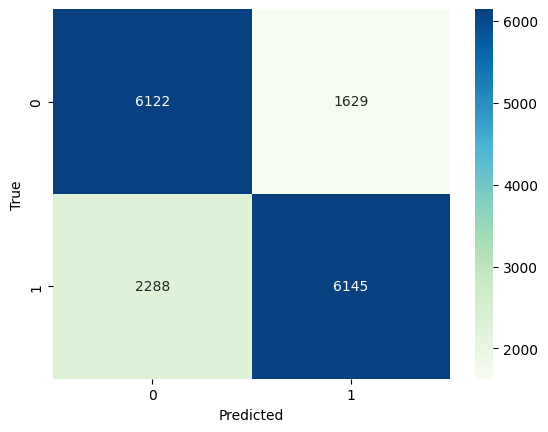

In [1627]:

tree_model2 = tree.DecisionTreeClassifier(criterion = 'entropy',
                                        max_depth = 13,
                                        min_samples_leaf = 6,
                                        ccp_alpha = 0.001,
                                        min_samples_split= 36)


model2 = tree_model2.fit(X = x_train2, y = y_train2)
y_pred2 = model2.predict(x_test2)


tabla2 = confusion_matrix(y_test2, y_pred2)
sns.heatmap(tabla2,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')


In [1628]:
mostrar_metricas(y_test2, y_pred2)

Accuracy: 0.7579708353929807
Recall: 0.7286849282580339
Precision: 0.7904553640339593
f1 score: 0.7583143086320726


In [1629]:
df_split_test2 = df_split_test_dum2.drop(['is_canceled', 'id'], axis='columns', inplace=False)
ids2 = df_split_test_dum2['id'].copy()

columnas_faltantes_en_train = set(df_split_test_dum2.columns) - set(df_split_train_dum2.columns)
columnas_faltantes_en_test = set(df_split_train_dum2.columns)- set(df_split_test_dum2.columns)

print('Columnas faltantes es train:', columnas_faltantes_en_train)
print('Columnas faltantes es test:', columnas_faltantes_en_test)

prediccion2 = model2.predict(df_split_test2)

df_prediccion2 = pd.DataFrame({'id': ids2, 'is_canceled': prediccion2})

df_prediccion2.to_csv('df_prediccion')
files.download('df_prediccion.csv')

Columnas faltantes es train: set()
Columnas faltantes es test: set()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## » Muestra del arbol

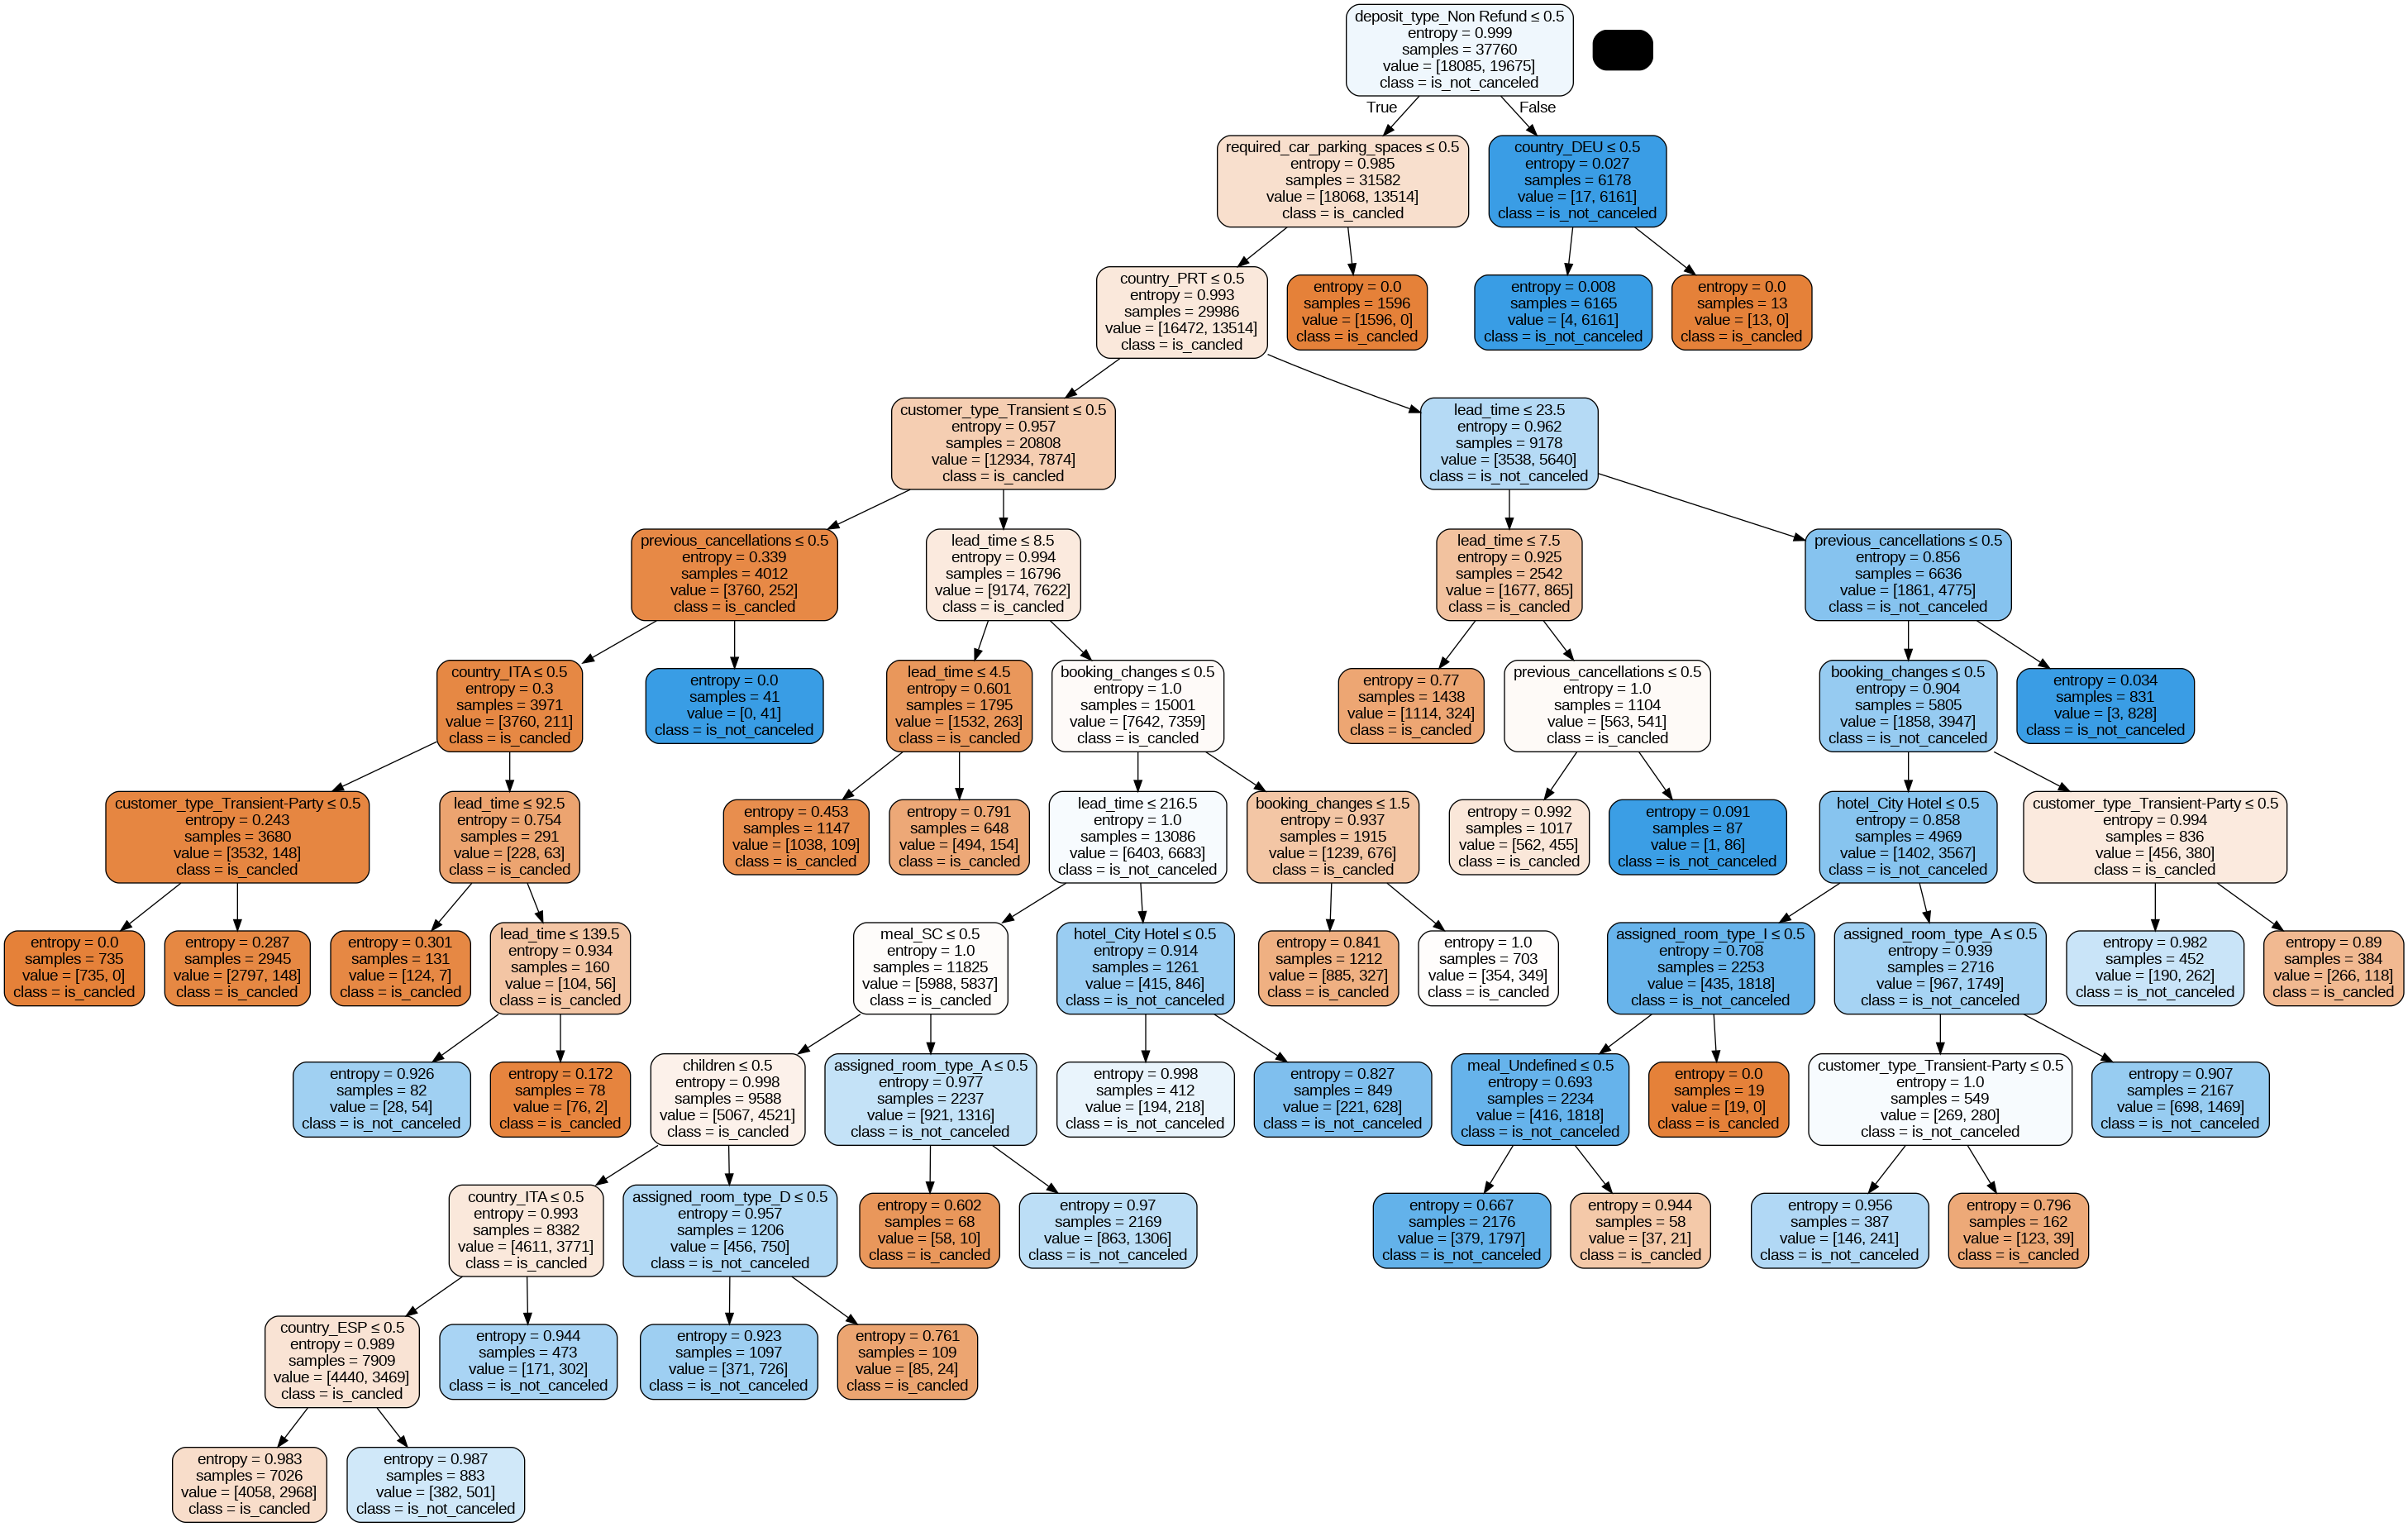

In [1630]:

dot_data = StringIO()
export_graphviz(model2, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=df_split_test2.columns.to_list(),
                class_names=['is_cancled','is_not_canceled'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())



## » Optimizacion de parametros con Random Search -  Cross Validation (Modelo 3)

Seguimos utilizando lo mismo que el modelo 2

In [1631]:
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score

#Cantidad de combinaciones que quiero porbar
n=10

#Conjunto de parámetros que quiero usar
params_grid = {'criterion':['gini','entropy'],
               'min_samples_leaf':list(range(5,50)),
               'min_samples_split': list(range(4,40)),
               'ccp_alpha':np.linspace(0.001,0.005,n),
               'max_depth':list(range(5,30))}

#Cantidad de splits para el Cross Validation
folds=15

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
base_tree = DecisionTreeClassifier()

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(f1_score)

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n)

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train2,y_train2);

In [1632]:
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_)

{'min_samples_split': 10, 'min_samples_leaf': 41, 'max_depth': 10, 'criterion': 'gini', 'ccp_alpha': 0.001888888888888889}
0.7653790434249887


In [1633]:
randomcv.cv_results_['mean_test_score']

array([0.67530171, 0.76537904, 0.68087598, 0.68087598, 0.72145554,
       0.73922298, 0.67525362, 0.72054912, 0.70865549, 0.68087598])

In [1634]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(df_split_train_dum2.drop(['id', 'is_canceled'], axis=1).values,
                                                     df_split_train2[target2].values,
                                                     test_size=0.2,
                                                     random_state=13,
                                                     stratify=df_split_train2[target2].values)


In [1635]:
#Entrenamiento con K Fold Cross Validation
from sklearn.model_selection import cross_validate, StratifiedKFold

# Spits que respeten la proporción delas clases
kfoldcv =StratifiedKFold(n_splits=15)

#Creo árbol con los mejores hiperparámetros
arbolcv3 = DecisionTreeClassifier().set_params(**randomcv.best_params_)

#Selecciono métrica F1-Score
scorer_fn = make_scorer(f1_score)

#Hago CV
resultados = cross_validate(arbolcv3,x_train3, y_train3, cv=kfoldcv,scoring=scorer_fn,return_estimator=True)

metricsCV=resultados['test_score']
mejor_performance=resultados['estimator'][np.where(metricsCV==max(metricsCV))[0][0]]


In [1636]:
resultados

{'fit_time': array([0.36552835, 0.36050963, 0.35950112, 0.36475658, 0.39023709,
        0.57230854, 0.52361727, 0.55164218, 0.52554679, 0.48096776,
        0.34308481, 0.34353065, 0.33781934, 0.34217691, 0.35526037]),
 'score_time': array([0.00375819, 0.00498438, 0.00351524, 0.00350356, 0.00346851,
        0.0050602 , 0.00499105, 0.00522637, 0.00674987, 0.00363231,
        0.00346136, 0.00473762, 0.00472307, 0.00378776, 0.00398469]),
 'estimator': [DecisionTreeClassifier(ccp_alpha=0.001888888888888889, max_depth=10,
                         min_samples_leaf=41, min_samples_split=10),
  DecisionTreeClassifier(ccp_alpha=0.001888888888888889, max_depth=10,
                         min_samples_leaf=41, min_samples_split=10),
  DecisionTreeClassifier(ccp_alpha=0.001888888888888889, max_depth=10,
                         min_samples_leaf=41, min_samples_split=10),
  DecisionTreeClassifier(ccp_alpha=0.001888888888888889, max_depth=10,
                         min_samples_leaf=41, min_samples_

In [1637]:
metricsCV


array([0.68623562, 0.77426833, 0.69544741, 0.77513926, 0.68421053,
       0.70542333, 0.70117647, 0.77910959, 0.77247759, 0.70031299,
       0.70754717, 0.77985948, 0.69245953, 0.69459671, 0.77748767])

Text(50.722222222222214, 0.5, 'True')

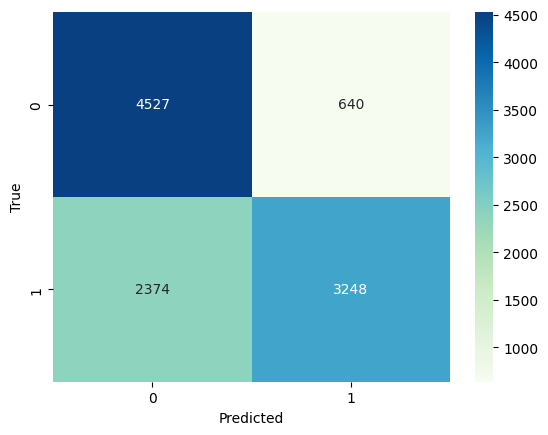

In [1638]:

model3 = arbolcv3.fit(X = x_train3, y = y_train3)
y_pred3 = model3.predict(x_test3)


tabla3 = confusion_matrix(y_test3, y_pred3)

sns.heatmap(tabla3,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [1639]:
mostrar_metricas(y_test3, y_pred3)

Accuracy: 0.7206413940124201
Recall: 0.5777303450729278
Precision: 0.8353909465020576
f1 score: 0.6830704521556257


In [1640]:
df_split_test3 = df_split_test_dum2.drop(['is_canceled', 'id'], axis='columns', inplace=False)
ids3 = df_split_test_dum2['id'].copy()

prediccion3 = mejor_performance.predict(df_split_test3)

df_prediccion3 = pd.DataFrame({'id': ids3, 'is_canceled': prediccion3})

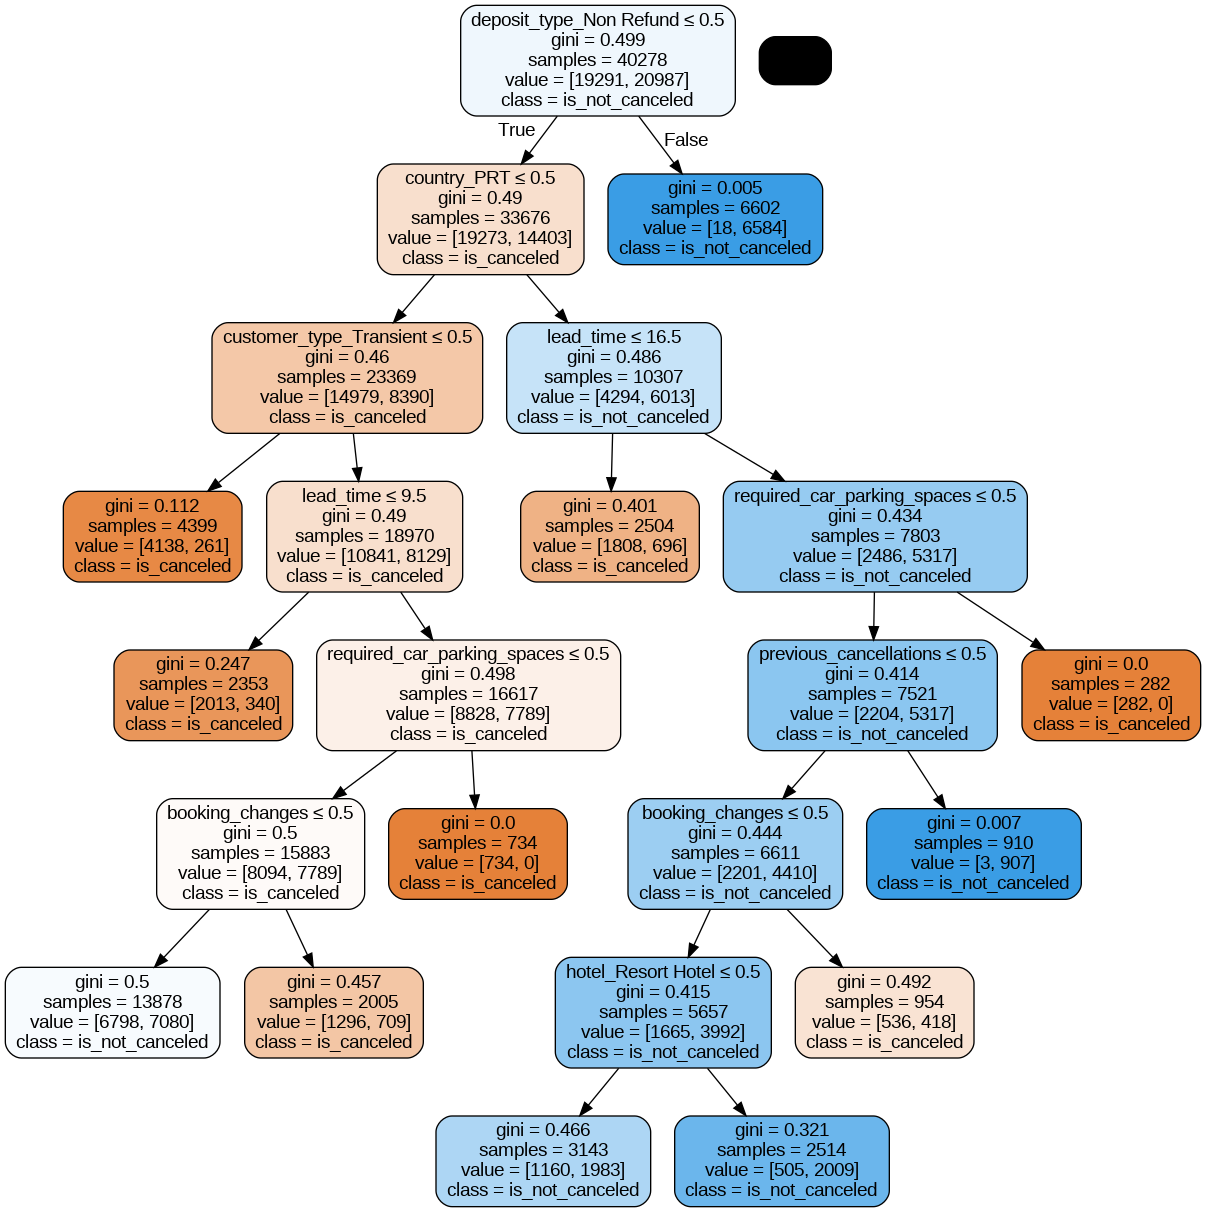

In [1641]:
#Grafico
dot_data = StringIO()
export_graphviz(mejor_performance, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                feature_names=df_split_test3.columns.to_list(),
                class_names=['is_canceled','is_not_canceled'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### » Modelo 4 pruebas con Ingeniería de Features

In [1642]:
df_trabajo_train['total_guests'] = df_trabajo_train['adults'] + df_trabajo_train['children']
df_trabajo_test['total_guests'] = df_trabajo_test['adults'] + df_trabajo_test['children']

df_trabajo_train['room_type_match'] = df_trabajo_train['assigned_room_type'] == df_trabajo_train['reserved_room_type']
df_trabajo_test['room_type_match'] = df_trabajo_test['assigned_room_type'] == df_trabajo_test['reserved_room_type']

df_trabajo_train['days_in_waiting_list'] = ds_trabajo_train['days_in_waiting_list'] >= 0

df_trabajo_train['cancel_to_noncancel_ratio'] = df_trabajo_train['previous_cancellations'] / (1 + df_trabajo_train['previous_bookings_not_canceled'])
df_trabajo_train['lead_time_category'] = pd.cut(df_trabajo_train['lead_time'], bins=[0, 10, 50, 100, 500, float('inf')], labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'])


df_trabajo_test['cancel_to_noncancel_ratio'] = df_trabajo_train['previous_cancellations'] / (1 + df_trabajo_train['previous_bookings_not_canceled'])
df_trabajo_test['lead_time_category'] = pd.cut(df_trabajo_test['lead_time'], bins=[0, 10, 50, 100, 500, float('inf')], labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'])


In [1643]:

features4 = ['hotel','lead_time', 'meal', 'country', 'is_repeated_guest', 'booking_changes', 'deposit_type', 'days_in_waiting_list',
             'customer_type', 'required_car_parking_spaces', 'total_guests', 'room_type_match','is_canceled', 'id']


df_split_train4 = df_trabajo_train[features4]
df_split_test4= df_trabajo_test[features4]


features_to_dum4 = [ 'hotel', 'meal', 'country', 'deposit_type', 'customer_type']

target4 = 'is_canceled'

df_split_test4.isna().sum()

hotel                          0
lead_time                      0
meal                           0
country                        0
is_repeated_guest              0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_guests                   0
room_type_match                0
is_canceled                    0
id                             0
dtype: int64

In [1644]:
df_split_test4.shape

(26535, 14)

In [1645]:
df_split_train4 = df_split_train4.dropna(subset=['country'])

train_countries = set(df_split_train4['country'].unique())
test_countries = set(df_split_test4['country'].unique())

# 1. Manejar ds_trabajo_train
for country in train_countries:
    # Si el país no está en ds_trabajo_test
    if country not in test_countries:
        country_count = df_split_train4['country'].value_counts()[country]
        # Si aparece menos del 0.01%
        if country_count / len(df_split_train4) <= 0.0001:
            df_split_train4.loc[df_split_train4['country'] == country, 'country'] = 'Undefined'

# 2. Manejar ds_trabajo_test
for country in test_countries:
    # Si el país no está en ds_trabajo_train (después de las posibles sustituciones)
    if country not in train_countries:
        df_split_test4.loc[df_split_test4['country'] == country, 'country'] = 'Undefined'

In [1646]:
missing_categories = set(df_split_train4['country'].unique()) - set(df_split_test4['country'].unique())

# Cambiar estas categorías a 'Undefined' en 'ds_trabajo_train'
for category in missing_categories:
    df_split_train4.loc[df_split_train4['country'] == category, 'country'] = 'Undefined'

In [1647]:

df_split_train_dum4 = pd.get_dummies(df_split_train4[features4], columns = features_to_dum4)
df_split_test_dum4 = pd.get_dummies(df_split_test4[features4], columns = features_to_dum4)

x_train4, x_test4, y_train4, y_test4 = train_test_split(df_split_train_dum4.drop(['id', 'is_canceled'], axis=1).values,
                                                     df_split_train4[target4].values,
                                                     test_size=0.3,
                                                     random_state=13,
                                                     stratify=df_split_train4[target4].values)



In [1648]:
from sklearn.model_selection import StratifiedKFold, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, f1_score

#Cantidad de combinaciones que quiero porbar
n=10

#Conjunto de parámetros que quiero usar
params_grid = {'criterion':['gini','entropy'],
               'min_samples_leaf':list(range(5,50)),
               'min_samples_split': list(range(4,40)),
               'ccp_alpha':np.linspace(0.001,0.005,n),
               'max_depth':list(range(5,30))}

#Cantidad de splits para el Cross Validation
folds=15

#Kfold estratificado
kfoldcv = StratifiedKFold(n_splits=folds)

#Clasificador
base_tree = DecisionTreeClassifier()

#Metrica que quiero optimizar F1 Score
scorer_fn = make_scorer(f1_score)

#Random Search Cross Validation
randomcv = RandomizedSearchCV(estimator=base_tree,
                              param_distributions = params_grid,
                              scoring=scorer_fn,
                              cv=kfoldcv,
                              n_iter=n)

#Busco los hiperparamtros que optimizan F1 Score
randomcv.fit(x_train4,y_train4);

In [1649]:
print(randomcv.best_params_)
#Mejor métrica
print(randomcv.best_score_)

{'min_samples_split': 5, 'min_samples_leaf': 28, 'max_depth': 20, 'criterion': 'entropy', 'ccp_alpha': 0.002777777777777778}
0.7919404133920617


In [1650]:
randomcv.cv_results_['mean_test_score']

array([0.79194041, 0.78970605, 0.77333054, 0.79127812, 0.78970605,
       0.78865642, 0.78902367, 0.78865471, 0.78865471, 0.78889079])

In [1651]:
#Entrenamiento con K Fold Cross Validation
from sklearn.model_selection import cross_validate, StratifiedKFold

# Spits que respeten la proporción delas clases
kfoldcv =StratifiedKFold(n_splits=15)

#Creo árbol con los mejores hiperparámetros
arbolcv4 = DecisionTreeClassifier().set_params(**randomcv.best_params_)

#Selecciono métrica F1-Score
scorer_fn = make_scorer(f1_score)

#Hago CV
resultados = cross_validate(arbolcv4,x_train4, y_train4, cv=kfoldcv,scoring=scorer_fn,return_estimator=True)

metricsCV=resultados['test_score']
mejor_performance=resultados['estimator'][np.where(metricsCV==max(metricsCV))[0][0]]

In [1652]:
metricsCV

array([0.78910661, 0.79375623, 0.79327399, 0.78675228, 0.79636835,
       0.79631395, 0.79843953, 0.79974076, 0.79893475, 0.79518856,
       0.79325174, 0.79237577, 0.78274863, 0.78337122, 0.77948383])

Columnas faltantes es train: set()
Columnas faltantes es test: set()


Text(50.722222222222214, 0.5, 'True')

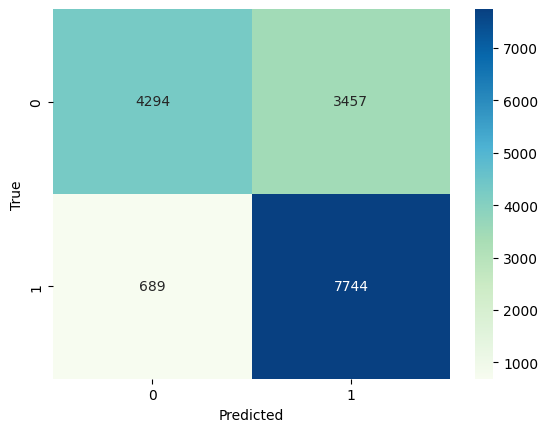

In [1653]:
columnas_faltantes_en_train = set(df_split_test_dum4.columns) - set(df_split_train_dum4.columns)
columnas_faltantes_en_test = set(df_split_train_dum4.columns)- set(df_split_test_dum4.columns)

print('Columnas faltantes es train:', columnas_faltantes_en_train)
print('Columnas faltantes es test:', columnas_faltantes_en_test)


model4 = arbolcv4.fit(X = x_train4, y = y_train4)
y_pred4 = model4.predict(x_test4)


tabla4 = confusion_matrix(y_test4,y_pred4)

sns.heatmap(tabla4,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [1654]:
mostrar_metricas(y_test4, y_pred4)

Accuracy: 0.7438210578348987
Recall: 0.9182971658958852
Precision: 0.691366842246228
f1 score: 0.7888356931852908


In [1655]:
df_trabajo_test_x4 = df_split_test_dum4.drop(['is_canceled', 'id'], axis='columns', inplace=False)
ids4 = df_split_test_dum4['id'].copy()
df_trabajo_test_x4.shape

prediccion4 = model4.predict(X = df_trabajo_test_x4)
df_resultado4 = pd.DataFrame(zip(ids4, prediccion4),columns=['id','is_canceled'])
# df_resultado4.to_csv('df_prediccion.csv')
# files.download('df_prediccion.csv')

In [1656]:
df_trabajo_test_x4.dropna().shape

(26535, 144)